In [6]:
import ROOT
import uproot
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import aghast
import boost_histogram as bh

In [2]:
from uproot.models.TH import Model_TH1D_v3 as TH1D

In [7]:
#import re
file_name = "a-nu_Mu_CC_all_ARCA6_v6.4_gp_bp_preproc.root"
tempoTwo = file_name.replace('_preproc.root', '')
RootOut = "./histo_processed/histos_"+ tempoTwo +".root"
print("===> Analysis Starts ! <===")


===> Analysis Starts ! <===


In [8]:
try:
    i =  uproot.open(file_name)
except FileNotFoundError:
    print("ERROR: could not open file")
dataTree = i['ProcessedEvents']
infoTree = i['QualityParameters']

In [9]:
run_number=run_subNumber=num_triggered_hits=pseudo_runid=pseudo_subRunid=num_cherenkov_hits=num_cascade_hits=num_triggered_lines=num_triggered_doms=num_triggered_pmts=num_cherenkov_lines=num_cherenkov_doms=num_cherenkov_pmts=num_cascade_lines=num_cascade_doms=num_cascade_pmts=-1
flag_muon_3D=flag_shower_3D=flag_shower_MX=0
livetime=pseudo_livetime=evt_id=evt_num=evt_overlays=reco_type=neutrino_type=jbeta0=jbeta0_deg=D=D3d=cos_zen=fi=R=mean_tres_it=zenith=logEreco=Ereco=E_nu=logEreco2=logbeta0=jlik=GNhit=Snpe=SnpeT=Slen=Elen=best_trk_pos_x=best_trk_pos_y=best_trk_pos_z=best_trk_dir_x=best_trk_dir_y=best_trk_dir_z=Q1=Q1new=diffangle=delta_zenith=mu_pos_x=mu_pos_y=mu_pos_z=nu_pos_x=nu_pos_y=nu_pos_z=cos_zen_mu=zenith_mu=logE_mu=logE_nu=logEbundle=logEdepos=bjorken_y=cos_zen_nu=zenith_nu=w1=w3=w3atm=w3iceHESE=w3loi=w3random=w3ice=w3antares=Ntrack_all=Nallbehind=Nallbehind2=Nallbehind3=NtrackIT10=NtrackIT30=NtrackIT=NtrackEarly=NtrackLate=TrLengthIT=TrLengthIT_2=TrLengthIT_3=ratio130=ratio430=ratio330=ratio110=ratio410=ratio310=ratio1=ratio2=ratio3=ratio4=ratio5=ratio6=ratiol=ratiol_trig=ratio4_trig=myratio50_muon=myratio30_muon=myratio50_cascmuon=myratio30_cascmuon=myratio50_casc=myratio30_casc=diff_theta=ratio_closehits_muon=ratio_closehits_cascmuon=ratio_closehits_casc=redToT_muon=redToT_cascmuon=redToT_casc=myratio50_cascmuon_over_mu=myratio30_cascmuon_over_mu=ratio_closehits_cascmuon_over_mu=redToT_cascmuon_over_mu=myratio50_casc_over_mu=myratio30_casc_over_mu=ratio_closehits_casc_over_mu=redToT_casc_over_mu =diff_dist_mu=diff_dist_casc_mu=diff_dist_casc=max_lik_down=max_lik_up=costheta_min=costheta_max=num_of_good_sol=downsol=upsol=nhits_casc=nhits_casc_100=sum_ToT_casc=min_dist_casc=max_dist_casc=nhits_mu=nhits_mu_100=sum_ToT_mu=min_dist_mu=max_dist_mu=nhits_casc_mu=nhits_casc_mu_100=sum_ToT_casc_mu=min_dist_casc_mu=max_dist_casc_mu=min_diff_sollik=max_diff_sollik=min_diff_sol=max_diff_sol=min_zen_sol=max_zen_sol=diffangle_shower_nu=diffangle_shower_mu=delta_zenith_shower_mu=delta_zenith_shower_nu=zenith_shower=beta0_shower=beta0_shower_deg=lik_shower=Nhit_shower=best_trk_pos_shower_x=best_trk_pos_shower_y=best_trk_pos_shower_z=best_trk_dir_shower_x=best_trk_dir_shower_y=best_trk_dir_shower_z=Ereco_shower=Ereco_shower_corrected=logEreco_shower=dlik=normdlik=itoverlen=delta_zenith_track_shower=diffangle_track_shower=ToT_border_mu=ToT_border_casc=ToT_border_cascmu=ToT_trig=max_ToT_trig=ToT_IT=ToT_allIT=Nborder_hits=Nborder_cherenkov_hits=Nborder_dtres_hits=Nborder_DOMs=Nhits_upper=Nhits_lower=Nhits_border_upper=Nhits_border_lower=Nhits_cherenkov_upper=Nhits_cherenkov_lower=Nhits_border_cherenkov_upper=Nhits_border_cherenkov_lower=ratio_cherenkov_lines=ratio_cherenkov_doms=ratio_cherenkov_pmts=ratio_cascade_doms=ratio_cascade_pmts=NtrackIT50=NtrackIT50_2=NtrackIT30_2=NtrackIT10_2=NtrackIT50_3=NtrackIT30_3=NtrackIT10_3=ratio_cherenkov_hits=ratio_cascade_hits=ratio_cascade_lines=-999.9
ratio_upper_nhits=ratio_lower_nhits=ratio_border_upper_nhits=ratio_border_lower_nhits=-999.0
float_num_triggered_hits=float_num_triggered_lines=float_num_triggered_doms=float_num_triggered_pmts=float_num_cherenkov_hits=float_num_cherenkov_lines=float_num_cherenkov_doms=float_num_cherenkov_pmts=float_num_cascade_hits=float_num_cascade_lines=float_num_cascade_doms=float_num_cascade_pmts=-999.9

In [10]:
df =  dataTree['pseudo_runid'].arrays(library='pd')
for i in dataTree.keys()[1:]:
   df = pd.concat([df, dataTree[i].arrays(library='pd')], axis=1, join='inner')

In [55]:
temp['num_cherenkov_lines'].unique()

array([2, 3, 1, 4, 5, 6, 0], dtype=int32)

In [43]:
dataTree.keys()

['pseudo_runid',
 'pseudo_subRunid',
 'pseudo_livetime',
 'evt_id',
 'evt_num',
 'evt_overlays',
 'reco_type',
 'jbeta0',
 'jbeta0_deg',
 'D',
 'D3d',
 'cos_zen',
 'fi',
 'R',
 'mean_tres_it',
 'zenith',
 'logEreco',
 'Ereco',
 'E_nu',
 'logEreco2',
 'logbeta0',
 'jlik',
 'GNhit',
 'Snpe',
 'SnpeT',
 'Slen',
 'Elen',
 'best_trk_pos_x',
 'best_trk_pos_y',
 'best_trk_pos_z',
 'best_trk_dir_x',
 'best_trk_dir_y',
 'best_trk_dir_z',
 'Q1',
 'Q1new',
 'diffangle',
 'delta_zenith',
 'mu_pos_x',
 'mu_pos_y',
 'mu_pos_z',
 'nu_pos_x',
 'nu_pos_y',
 'nu_pos_z',
 'cos_zen_mu',
 'zenith_mu',
 'logE_mu',
 'logE_nu',
 'logEbundle',
 'logEdepos',
 'bjorken_y',
 'cos_zen_nu',
 'zenith_nu',
 'w3atm',
 'w3iceHESE',
 'w3loi',
 'w3random',
 'w3ice',
 'w3antares',
 'w1',
 'w2',
 'neutrino_type',
 'Ntrack_all',
 'Nallbehind',
 'Nallbehind2',
 'Nallbehind3',
 'NtrackIT10',
 'NtrackIT30',
 'NtrackIT',
 'NtrackEarly',
 'NtrackLate',
 'TrLengthIT',
 'TrLengthIT_2',
 'TrLengthIT_3',
 'ratio130',
 'ratio430',
 '

In [13]:
logEresolution_mu =( df['logEreco'] - df['logE_mu'] ) / df['logE_mu']
logEresolution_cor_mu = ( df['logEreco2']- df['logE_mu'] ) / df['logE_mu']
logEresolution_neu =( df['logEreco'] - df['logE_nu'] ) / df['logE_nu']
logEresolution_cor_neu = ( df['logEreco2'] - df['logE_nu'] ) / df['logE_nu']
logbeta0_deg = np.log(df['jbeta0_deg'])

In [14]:
anti_noise_cuts = df.loc[(df['jlik'] >50) & (df['GNhit'] > 20)]

In [15]:
common_level = df.loc[(df['jlik']>40)& (df['Slen'] > 100) & (df['zenith'] > 80) & (df['logbeta0'] < -1.5)]

In [16]:
first_precuts = df.loc[(df['jlik'] > 50) & (df['Slen'] > 100) & (df['zenith'] > 80) & (df['logbeta0'] < -1.5) & \
                        (df['logEreco'] > 2.7) & (df['TrLengthIT_2'] >100.0) & (df['num_triggered_doms'] >= 5)]

In [17]:
up_cut = df.loc[df['zenith'] > 90]

In [18]:
run_ids = np.sort(df['pseudo_runid'].unique())

In [19]:
evts_3d_muon_to_run = [df.loc[(df['pseudo_runid']==i) & (df['flag_muon_3D']>0)].shape[0] for i in run_ids]
evts_3d_shower_to_run = [df.loc[(df['pseudo_runid']==i) & (df['flag_shower_3D']>0)].shape[0] for i in run_ids]
evts_mx_shower_to_run = [df.loc[(df['pseudo_runid']==i) & (df['flag_shower_MX']>0)].shape[0] for i in run_ids]
reco_events_to_run = [df.loc[(df['pseudo_runid']==i)].shape[0] for i in run_ids]

In [20]:
up_evts_3d_muon_to_run = [up_cut.loc[(up_cut['pseudo_runid']==i) & (up_cut['flag_muon_3D']>0)].shape[0] for i in run_ids]
up_evts_3d_shower_to_run = [up_cut.loc[(up_cut['pseudo_runid']==i) & (up_cut['flag_shower_3D']>0)].shape[0] for i in run_ids]
up_evts_mx_shower_to_run = [up_cut.loc[(up_cut['pseudo_runid']==i) & (up_cut['flag_shower_MX']>0)].shape[0] for i in run_ids]
up_reco_events_to_run = [up_cut.loc[(up_cut['pseudo_runid']==i)].shape[0] for i in run_ids]

In [21]:
c_evts_3d_muon_to_run = [anti_noise_cuts.loc[(anti_noise_cuts['pseudo_runid']==i) & (anti_noise_cuts['flag_muon_3D']>0)].shape[0] for i in run_ids]
c_evts_3d_shower_to_run = [anti_noise_cuts.loc[(anti_noise_cuts['pseudo_runid']==i) & (anti_noise_cuts['flag_shower_3D']>0)].shape[0] for i in run_ids]
c_evts_mx_shower_to_run = [anti_noise_cuts.loc[(anti_noise_cuts['pseudo_runid']==i) & (anti_noise_cuts['flag_shower_MX']>0)].shape[0] for i in run_ids]
c_reco_events_to_run = [anti_noise_cuts.loc[(anti_noise_cuts['pseudo_runid']==i)].shape[0] for i in run_ids]

In [114]:
#up_anti_noise_cuts = pd.concat([up_cut, anti_noise_cuts], axis=1, join='inner')

In [22]:
up_anti_noise_cuts = anti_noise_cuts.loc[list(set(up_cut.index).intersection(set(anti_noise_cuts.index)))]

In [23]:
c_up_run_ids = np.sort(up_anti_noise_cuts['pseudo_runid'].unique())
c_up_evts_3d_muon_to_run = [up_anti_noise_cuts.loc[(up_anti_noise_cuts['pseudo_runid']==i) & (up_anti_noise_cuts['flag_muon_3D']>0)].shape[0] for i in c_up_run_ids]
c_up_evts_3d_shower_to_run = [up_anti_noise_cuts.loc[(up_anti_noise_cuts['pseudo_runid']==i) & (up_anti_noise_cuts['flag_shower_3D']>0)].shape[0] for i in c_up_run_ids]
c_up_evts_mx_shower_to_run = [up_anti_noise_cuts.loc[(up_anti_noise_cuts['pseudo_runid']==i) & (up_anti_noise_cuts['flag_shower_MX']>0)].shape[0] for i in c_up_run_ids]
c_up_reco_events_to_run = [up_anti_noise_cuts.loc[(up_anti_noise_cuts['pseudo_runid']==i)].shape[0] for i in c_up_run_ids]

In [24]:
first_evts_3d_muon_to_run = [first_precuts.loc[(first_precuts['pseudo_runid']==i) & (first_precuts['flag_muon_3D']>0)].shape[0] for i in run_ids]
first_evts_3d_shower_to_run = [first_precuts.loc[(first_precuts['pseudo_runid']==i) & (first_precuts['flag_shower_3D']>0)].shape[0] for i in run_ids]
first_evts_mx_shower_to_run = [first_precuts.loc[(first_precuts['pseudo_runid']==i) & (first_precuts['flag_shower_MX']>0)].shape[0] for i in run_ids]
first_reco_events_to_run = [first_precuts.loc[(first_precuts['pseudo_runid']==i)].shape[0] for i in run_ids]

In [25]:
first_up_cuts = first_precuts.loc[list(set(up_cut.index).intersection(set(first_precuts.index)))]

In [26]:
first_up_run_ids = np.sort(first_up_cuts['pseudo_runid'].unique())
first_up_evts_3d_muon_to_run = [first_up_cuts.loc[(first_up_cuts['pseudo_runid']==i) & (first_up_cuts['flag_muon_3D']>0)].shape[0] for i in first_up_run_ids]
first_up_evts_3d_shower_to_run = [first_up_cuts.loc[(first_up_cuts['pseudo_runid']==i) & (first_up_cuts['flag_shower_3D']>0)].shape[0] for i in first_up_run_ids]
first_up_evts_mx_shower_to_run = [first_up_cuts.loc[(first_up_cuts['pseudo_runid']==i) & (first_up_cuts['flag_shower_MX']>0)].shape[0] for i in first_up_run_ids]
first_up_reco_events_to_run = [first_up_cuts.loc[(first_up_cuts['pseudo_runid']==i)].shape[0] for i in first_up_run_ids]

In [29]:
the_w2 = w3ice / icecube_flux_diff2019(df['E_nu'])
new_w3ice = the_w2 * icecube_flux_diff2021(df['E_nu'])
#double w3 = 1.0
w3 = new_w3ice

array([76061., 76793., 74917., 73082., 71757., 70097., 68037., 65650.,
       63285., 61338., 58675., 56576., 54823., 53200., 50818., 49206.,
       47949., 46392., 45420., 44602., 43378., 42765., 42407., 40507.,
       40130., 38806., 37942., 36986., 36166., 35032., 33741., 32940.,
       32243., 31529., 30622., 30689., 30779., 31162., 31143., 31460.,
       31703., 31723., 32100., 32428., 32934., 33289., 33689., 35900.,
       38438., 43429., 44912., 40115., 38011., 36709., 36550., 36430.,
       35868., 35173., 34557., 33916., 33520., 32939., 31864., 31295.,
       30395., 29605., 29532., 29532., 29488., 29494., 29718., 29738.,
       29775., 29700., 29384., 29021., 29276., 28797., 28721., 28392.,
       28310., 28606., 28022., 28102., 27829., 27907., 28257., 28450.,
       28497., 28940., 28866., 29436., 29203., 29298., 29718., 29450.,
       29397., 29618., 29687., 28912.])

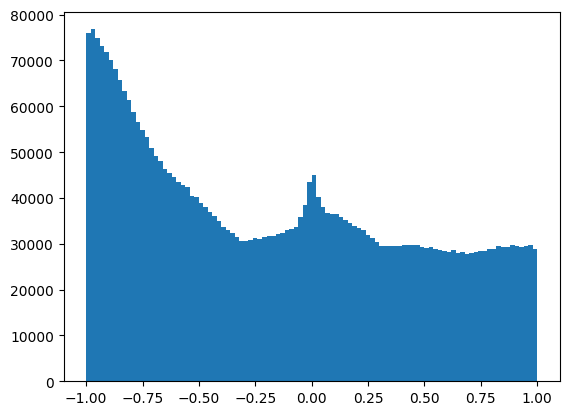

In [41]:
plt.hist(df['cos_zen'].to_numpy(), bins=100)[0]

In [ ]:
#TH1D CosZen ("CosZen","; Cos(reco_zenith)",100,-1,1)
#file = ROOT.TFile("demo_root_file.root", "RECREATE")
with uproot.recreate("demo_root_file.root") as file:
    #hist = bh.Histogram(bh.axis.Regular(100, -1, 1))
    #hist.fill(df['cos_zen'].to_numpy() , weight = w3)
    #file['CosZen'] = hist.to_numpy()
    file['CosZen'] = plt.hist(df['cos_zen'].to_numpy(), weights = w3)[0]

    hist = bh.Histogram(bh.axis.Regular(700, -100, 600))
    hist.fill(df['jlik'].to_numpy(), weight = w3)
    file['Lik'] = hist.to_numpy()

    hist = bh.Histogram(bh.axis.Regular(400, -4, 0))
    hist.fill(df['logbeta0'].to_numpy(), weight = w3)
    file['LogBeta0'] = hist.to_numpy()

    hist = bh.Histogram(bh.axis.Regular(600, -4, 2))
    hist.fill(df['jbeta0_deg'].to_numpy(), weight = w3)
    file['Beta0_deg'] = hist.to_numpy()
    
    hist = bh.Histogram(bh.axis.Regular(200, 0, 200))
    hist.fill(df['num_triggered_doms'].to_numpy(), weight = w3)
    file['DOMs'] = hist.to_numpy()
#file.WriteObject(hist, "CosZen")

In [ ]:
np.histogram(df['cos_zen'].to_numpy(),100, weights = w3)


In [30]:
file_name4 = "demo_root_file.root" #"histo_processed/histos_a-nu_Mu_CC_all_ARCA6_v6.4_gp_bp.root"
i4 = uproot.open(file_name4)
i4['CosZen'].to_numpy()

(array([-76053393.89998272, -76785320.69998708, -74909508.2999759 ,
        -73074691.79996496, -71749824.29995707, -70089990.29994717,
        -68030196.2999349 , -65643434.99993159, -63278671.49993511,
        -61332866.09993801, -58668132.59994198, -56570342.39994511,
        -54817517.69994772, -53195679.89995014, -50811918.29995369,
        -49202079.29995609, -47945204.99995796, -46385360.99996029,
        -45417457.79996173, -44595539.99996296, -43373662.19996478,
        -42760723.49996569, -42402759.29996622, -40502949.29996905,
        -40125986.99996962, -38802119.39997159, -37938205.79997288,
        -36983301.2999743 , -36161383.49997552, -35028496.79997721,
        -33737625.89997914, -32936705.99998033, -32239775.69998137,
        -31527846.89998243, -30616937.99998379, -30686930.99998368,
        -30774922.19998355, -31158883.79998298, -31141885.49998301,
        -31454854.19998254, -31699829.69998217, -31719827.69998214,
        -32096789.99998158, -32425757.09998109, 

In [33]:
file_name5 = "histo_processed/histos_a-nu_Mu_CC_all_ARCA6_v6.4_gp_bp.root"
i5 = uproot.open(file_name5)
i5['CosZen'].to_numpy()

(array([5.79076995e-09, 6.36891994e-09, 6.50197421e-09, 6.50639923e-09,
        6.63357336e-09, 6.79441310e-09, 6.85649203e-09, 6.91152510e-09,
        7.08429919e-09, 7.07887740e-09, 6.91176416e-09, 6.91516579e-09,
        6.86340908e-09, 6.87664058e-09, 6.82233249e-09, 6.75955547e-09,
        6.76661317e-09, 6.79009493e-09, 6.89023818e-09, 6.98644817e-09,
        7.04613140e-09, 7.19462871e-09, 7.35294901e-09, 7.28675430e-09,
        7.44623109e-09, 7.39447928e-09, 7.58635729e-09, 7.58166249e-09,
        7.70705094e-09, 7.67695160e-09, 7.62644743e-09, 7.77255708e-09,
        7.78710760e-09, 7.91964411e-09, 7.69190901e-09, 7.93696599e-09,
        7.91307676e-09, 8.07916626e-09, 8.15396235e-09, 8.17137346e-09,
        8.35123400e-09, 8.25166745e-09, 8.42281548e-09, 8.59122059e-09,
        8.81198648e-09, 8.96708699e-09, 8.99974820e-09, 9.35575568e-09,
        9.54677750e-09, 9.57272584e-09, 9.82227429e-09, 9.75970495e-09,
        9.57736083e-09, 9.50407238e-09, 9.46588429e-09, 9.385456

In [ ]:
([i for i in i5['CosZen'].to_numpy()[0]])

In [28]:
def icecube_flux_diff2019(E):
    E_over_100_TeV = E / 100000.0
    f = 1.44 * (10 ** -18) * (E_over_100_TeV ** -2.28);  # flux  from IceCube diffuse astrophysics numuCC analysis in GeV^-1 s^-1 cm^-2 sr^-1
    return 0.5 * 10000.0 * f

def icecube_flux_diff2021(E):
  E_over_100_TeV = E / 100000.0
  f = 1.44 * (10 ** -18) * (E_over_100_TeV ** -2.37);  # flux  from IceCube diffuse astrophysics numuCC analysis in GeV^-1 s^-1 cm^-2 sr^-1
  return 0.5 * 10000.0 * f                                          # have flux in GeV^-1 s^-1 m^-2 sr^-1